In [1]:
import sys
sys.path.append('..')

from Helpers.Helpers import *

In [109]:

#lrest = ca.SX([0.09, 0.04, 0.06, 0.1, 0.19, 0.14])
#Fmax = ca.SX([1142, 260, 987, 624, 430, 798])
#vmax = 6.28*lrest

def Todorov_fl(l):
    return np.exp(-np.abs((l**1.93-1)/1.03)**1.87)

def Todorov_fv(l,v):
    if v <= 0 : return (-5.72-v)/(-5.72+(1.38+2.09*l)*v)
    else : return (0.62-(-3.12+4.21*l-2.67*l*l)*v)/(0.62+v)

def Todorov_fp(l):
    return -0.02*np.exp(14.773-18.7*l)+0.02



def origin_fast_fl(l):
    return np.exp(-np.abs((l**1.55-1)/.81)**2.12)

def origin_fast_fv(l,v):
    if v <=0 : return (-7.39-v)/(-7.39-3.21*v+4.17*l*v)
    if v >= 0: return (1.05-(-1.53*v))/(1.05+v)

def origin_fast_fp(l) : 
    return min(-0.02*np.exp(-18.7*(l-0.79))+0.02,0)+69.6*0.058*np.log(np.exp((l-1.5)/0.0598)+1)




def origin_slow_fp(l) : 
    return min(-0.02*np.exp(-18.7*(l-0.79))+0.02,0)+76.4*0.053*np.log(np.exp((l-1.4)/0.053)+1)

def origin_slow_fl(l):
    return np.exp(-(np.abs((l**2.3-1)/1.26)**1.62))

def origin_slow_fv(l,v):
    if v <=0 : return (-4.06-v)/(-4.06+5.88*v)
    if v > 0: return (0.18-(-4.7+8.41*l-5.34*l*l)*v)/(0.18+v)



# Functions
def my_fl(l_normalized):
    return np.exp(-((l_normalized-1) / 0.5) ** 2)

def my_fv(v_normalized):
    vmax = -0.628
    return (vmax - v_normalized) / (vmax + 0.3 * v_normalized)


# Generate data

# Generate data
#l_values = np.linspace(0.7, 1.3, 100)
#v_values = np.linspace(-2, 2, 100)
#L, V = np.meshgrid(l_values, v_values)
#Z = np.zeros((100,100))
#for i in range(100):
#    for j in range(100):
#        Z[i,j] = my_fl(L[i,j]) * my_fv(L[i,j]) 
#
## Plotting
#fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111, projection='3d')
#
#ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)
#
## Labels and title
#ax.set_xlabel('l_normalized')
#ax.set_ylabel('v_normalized')
#ax.set_zlabel('fl(l) * fv(v)')
#ax.set_title('My 3D plot')
#ax.invert_xaxis()
#
#plt.show()


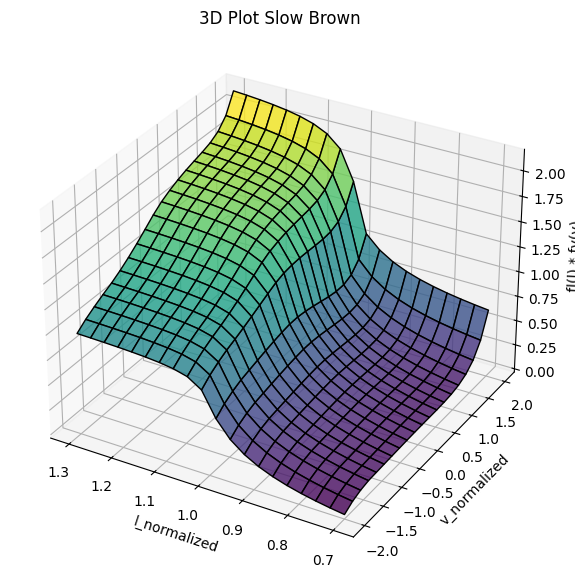

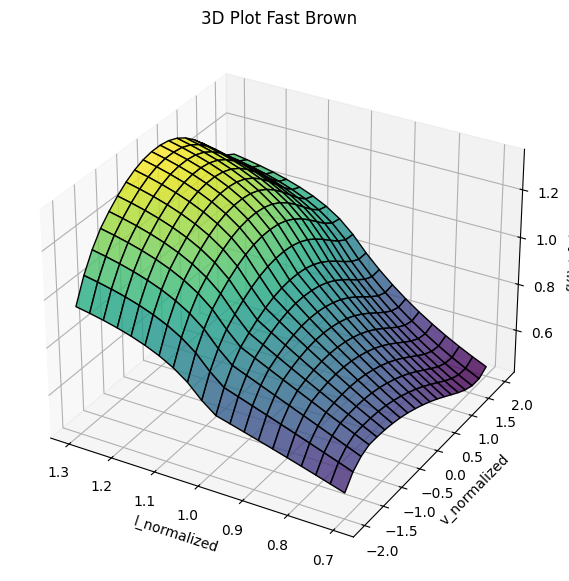

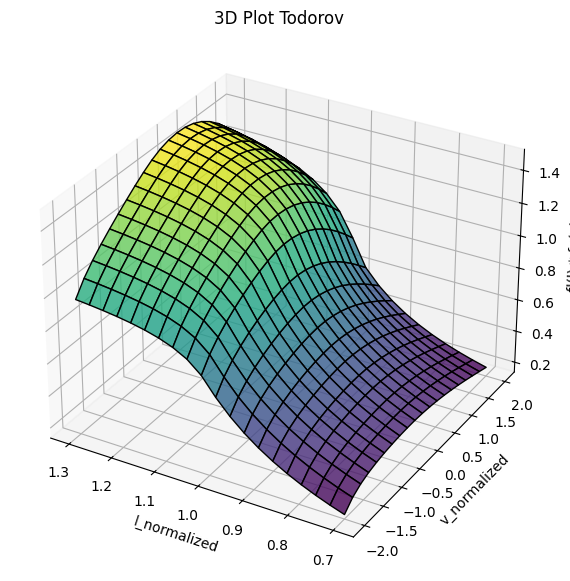

In [110]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
l_values = np.linspace(0.7, 1.3, 20)
v_values = np.linspace(-2, 2, 20)
L, V = np.meshgrid(l_values, v_values)
Z = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        Z[i,j] = origin_slow_fl(l_values[i]) * origin_slow_fv(l_values[i],v_values[j]) + origin_slow_fp(l_values[i])


ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Slow Brown')
ax.invert_xaxis()

plt.show()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(20):
    for j in range(20):
        Z[i,j] = origin_fast_fl(l_values[i]) * origin_fast_fv(l_values[i],v_values[j]) + origin_fast_fp(l_values[i])


ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Fast Brown')
ax.invert_xaxis()

plt.show()
#
#l_values = np.linspace(0.7, 1.3, 100)
#v_values = np.linspace(-2, 2, 100)
#L, V = np.meshgrid(l_values, v_values)
#Z = np.zeros((100,100))
#for i in range(100):
#    for j in range(100):
#        Z[i,j] = origin_fast_fl(L[i,j]) * origin_fast_fv(L[i,j],V[i,j]) + origin_fast_fp(L[i,j])
#
## Plotting
#fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111, projection='3d')
#
#ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)
#
## Labels and title
#ax.set_xlabel('l_normalized')
#ax.set_ylabel('v_normalized')
#ax.set_zlabel('fl(l) * fv(v)')
#ax.set_title('3D Plot Fast Brown')
#ax.invert_xaxis()
#
#plt.show()
## Generate data

for i in range(20):
    for j in range(20):
        Z[i,j] = Todorov_fl(l_values[i]) * Todorov_fv(l_values[i],v_values[j]) + Todorov_fp(l_values[i])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Todorov')
ax.invert_xaxis()

plt.show()